In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("RELIANCE.csv" , encoding = "ISO-8859-1")
df.shape

(738, 7)

In [3]:
df.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-10,1263.027710,1265.009033,1238.361572,1244.057617,1228.625610,7125920.0
2018-09-11,1247.177979,1256.489746,1222.660400,1226.078003,1210.869141,10977849.0
2018-09-12,1240.045654,1246.880859,1217.311157,1240.739014,1225.348267,8142006.0
2018-09-14,1247.574219,1263.622070,1235.934570,1241.382935,1225.984253,7953264.0
2018-09-17,1239.005493,1239.005493,1210.129150,1214.388794,1199.324951,6818107.0
...,...,...,...,...,...,...
2021-09-02,2255.000000,2307.800049,2255.000000,2294.399902,2294.399902,4595048.0
2021-09-03,2310.000000,2395.000000,2302.500000,2388.500000,2388.500000,14151629.0
2021-09-06,2413.000000,2480.000000,2412.000000,2425.600098,2425.600098,15525644.0


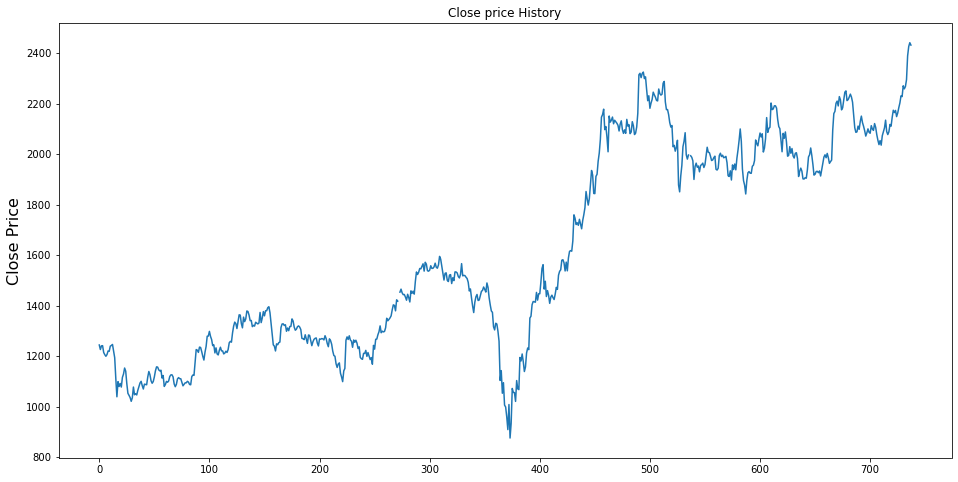

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.ylabel('Close Price', fontsize=16)
plt.show()

In [5]:
df1 = df.dropna(how="any")

In [6]:
data1 = df1.filter(['Close'])
len(data1)

736

In [7]:
data = data1.values
data

array([[1244.057617],
       [1226.078003],
       [1240.739014],
       [1241.382935],
       [1214.388794],
       [1205.720947],
       [1199.381104],
       [1206.067627],
       [1220.481079],
       [1219.044678],
       [1239.649414],
       [1241.977295],
       [1246.137817],
       [1220.134399],
       [1193.78418 ],
       [1111.712036],
       [1039.001343],
       [1098.982788],
       [1079.814453],
       [1091.751343],
       [1077.585571],
       [1115.97168 ],
       [1129.047729],
       [1152.871948],
       [1140.489258],
       [1090.95874 ],
       [1052.671753],
       [1044.796387],
       [1035.93042 ],
       [1021.120789],
       [1035.088379],
       [1077.585571],
       [1047.074829],
       [1051.284912],
       [1046.331787],
       [1064.806641],
       [1080.062134],
       [1093.732544],
       [1100.270508],
       [1083.182495],
       [1069.858765],
       [1089.126221],
       [1087.640259],
       [1086.550537],
       [1116.813721],
       [11

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.23531839],
       [0.22383093],
       [0.23319808],
       [0.23360949],
       [0.2163625 ],
       [0.21082448],
       [0.20677385],
       [0.21104598],
       [0.22025496],
       [0.21933722],
       [0.23250192],
       [0.23398924],
       [0.23664746],
       [0.22003346],
       [0.20319789],
       [0.15076069],
       [0.10430467],
       [0.14262777],
       [0.13038081],
       [0.13800748],
       [0.12895674],
       [0.15348224],
       [0.16183674],
       [0.17705841],
       [0.16914691],
       [0.13750107],
       [0.11303891],
       [0.10800721],
       [0.1023426 ],
       [0.09288049],
       [0.10180461],
       [0.12895674],
       [0.10946294],
       [0.11215283],
       [0.1089882 ],
       [0.12079208],
       [0.13053906],
       [0.1392733 ],
       [0.14345051],
       [0.13253271],
       [0.12401996],
       [0.13633025],
       [0.13538084],
       [0.1346846 ],
       [0.15402023],
       [0.16832417],
       [0.16034942],
       [0.144

In [9]:
train_data_len = math.ceil(len(data) * 0.80)
train_data = scaled_data[0:train_data_len, :]

In [10]:
p=130
x_train = []
y_train = []
for i in range(p, len(train_data)):
    x_train.append(train_data[i-p:i, 0])
    y_train.append(train_data[i, 0])
    if i<=p+1:
        print(x_train)
        print(y_train)

[array([0.23531839, 0.22383093, 0.23319808, 0.23360949, 0.2163625 ,
       0.21082448, 0.20677385, 0.21104598, 0.22025496, 0.21933722,
       0.23250192, 0.23398924, 0.23664746, 0.22003346, 0.20319789,
       0.15076069, 0.10430467, 0.14262777, 0.13038081, 0.13800748,
       0.12895674, 0.15348224, 0.16183674, 0.17705841, 0.16914691,
       0.13750107, 0.11303891, 0.10800721, 0.1023426 , 0.09288049,
       0.10180461, 0.12895674, 0.10946294, 0.11215283, 0.1089882 ,
       0.12079208, 0.13053906, 0.1392733 , 0.14345051, 0.13253271,
       0.12401996, 0.13633025, 0.13538084, 0.1346846 , 0.15402023,
       0.16832417, 0.16034942, 0.14484291, 0.13848214, 0.14284927,
       0.15452656, 0.1700014 , 0.18003313, 0.1794318 , 0.17240646,
       0.16977982, 0.17158364, 0.15164676, 0.15807094, 0.13050739,
       0.13512768, 0.14332393, 0.14114037, 0.14439992, 0.15560255,
       0.15971651, 0.15996967, 0.15468481, 0.13680491, 0.12981115,
       0.13563401, 0.1494632 , 0.15284933, 0.15012778, 0.1499

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(459, 130, 1)

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(x_train, y_train, batch_size=4, epochs=10)

Epoch 1/10
115/115 [==============================] - 10s 87ms/step - loss: 0.0091
Epoch 2/10
115/115 [==============================] - 10s 87ms/step - loss: 0.0032 0s - 
Epoch 3/10
115/115 [==============================] - 11s 93ms/step - loss: 0.0026
Epoch 4/10
115/115 [==============================] - 10s 90ms/step - loss: 0.0020
Epoch 5/10
115/115 [==============================] - 12s 101ms/step - loss: 0.0021
Epoch 6/10
115/115 [==============================] - 12s 101ms/step - loss: 0.0016
Epoch 7/10
115/115 [==============================] - 11s 92ms/step - loss: 0.0015
Epoch 8/10
115/115 [==============================] - 11s 95ms/step - loss: 0.0014
Epoch 9/10
115/115 [==============================] - 11s 93ms/step - loss: 0.0014
Epoch 10/10
115/115 [==============================] - 12s 103ms/step - loss: 0.0011


In [14]:
test_data = scaled_data[train_data_len - p: , :]
x_test = []
y_test = data[train_data_len:, :]
for i in range(p, len(test_data)):
    x_test.append(test_data[i-p:i, 0])

In [15]:
x_test = np.array(x_test)
x_test.shape

(147, 130)

In [16]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
predict = model.predict(x_test)
predict = scaler.inverse_transform(predict)
predict

array([[1884.0979],
       [1900.0865],
       [1912.9249],
       [1928.8577],
       [1943.2075],
       [1958.1376],
       [1991.414 ],
       [2019.4965],
       [2035.8638],
       [2050.1282],
       [2065.5938],
       [2072.6233],
       [2077.6404],
       [2059.8936],
       [2041.9493],
       [2038.2411],
       [2064.25  ],
       [2079.4155],
       [2091.716 ],
       [2100.5112],
       [2132.4556],
       [2157.283 ],
       [2173.9014],
       [2185.861 ],
       [2192.1204],
       [2191.3767],
       [2175.028 ],
       [2148.6533],
       [2122.7415],
       [2091.0608],
       [2053.0413],
       [2042.9578],
       [2041.2222],
       [2051.4717],
       [2053.3005],
       [2036.5176],
       [2017.638 ],
       [2011.892 ],
       [2005.6841],
       [2006.5637],
       [2002.1443],
       [1994.7909],
       [1993.1565],
       [1994.8668],
       [1991.3167],
       [1967.4664],
       [1947.2086],
       [1936.4119],
       [1929.1018],
       [1917.3801],


In [18]:
rmse = np.sqrt(np.mean(predict - y_test)**2)
rmse

10.399241365752546

<ipython-input-19-fc40edb2b829>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predict


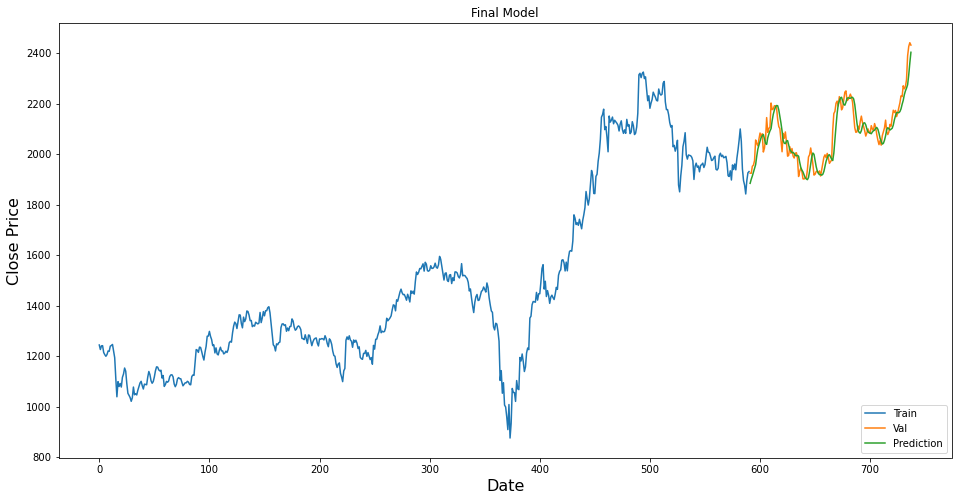

In [19]:
train = data1[:train_data_len]
valid = data1[train_data_len:]
valid['Prediction'] = predict
plt.figure(figsize=(16,8))
plt.title('Final Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()

In [20]:
df2 = pd.read_csv("RELIANCE.csv" , encoding = "ISO-8859-1")
new_df = df2.filter(['Close'])
new_df1 = new_df.dropna(how="any")
new_df2 = new_df1.values
data2_len = 342
data2 = new_df2[0:data2_len, :]
data2.shape

(342, 1)

In [21]:
last_days = data2[-p:]
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1401.577]]


In [22]:
x_input = test_data[147:].reshape(1,-1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
lst_output = []
n_steps = p
i=0
num = int(input())
while(i<num):
    
    if(len(temp_input)>p):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

20
[[0.9921369552612305], [0.9987029433250427], [1.0009703636169434], [1.0010241270065308], [0.9998863935470581], [0.9980955719947815], [0.9959578514099121], [0.9936599135398865], [0.9913186430931091], [0.9890061616897583], [0.9867634773254395], [0.9846095442771912], [0.982548177242279], [0.980573296546936], [0.9786728024482727], [0.9768330454826355], [0.9750394821166992], [0.9732787609100342], [0.9715405702590942], [0.9698156714439392]]


In [23]:
output = scaler.inverse_transform(lst_output)
output

array([[2428.5930487 ],
       [2438.86981229],
       [2442.4186677 ],
       [2442.50281553],
       [2440.72209073],
       [2437.91918437],
       [2434.57332859],
       [2430.97670856],
       [2427.31226649],
       [2423.69288362],
       [2420.18274367],
       [2416.81151294],
       [2413.58516201],
       [2410.49417527],
       [2407.5196148 ],
       [2404.64011712],
       [2401.8329194 ],
       [2399.07712463],
       [2396.35659358],
       [2393.65686626]])

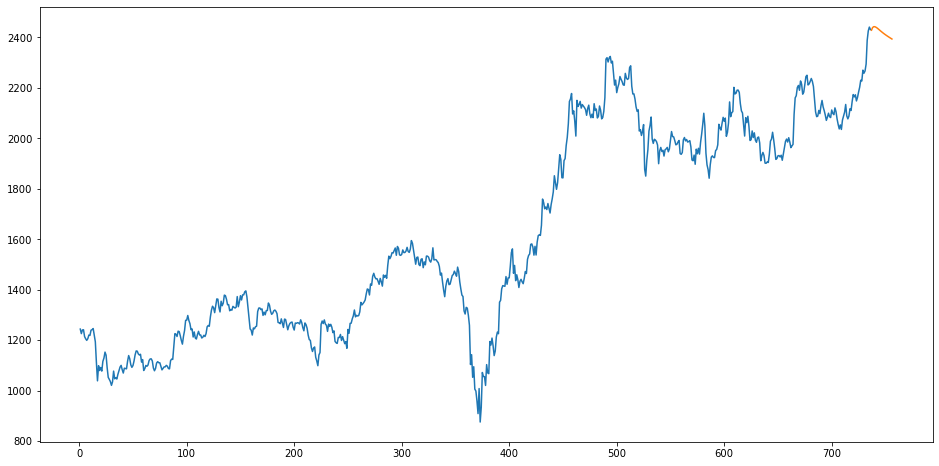

In [24]:
day_new = np.arange(1,737)
day_pred = np.arange(737,737+20)
plt.figure(figsize=(16,8))
plt.plot(day_new,data1[['Close']])
plt.plot(day_pred,output)
plt.show()

In [25]:
y = test_data[147:].reshape(1,-1)
temp1 = list(y)
temp1 = temp1[0].tolist()
lst1 = []
n1 = p
j=0
num = 10
while(j<num):
    
    if(len(temp1)>p):
        y=np.array(temp1[1:])
        y=y.reshape(1,-1)
        y = y.reshape((1, n1, 1))
        yhat1 = model.predict(y)
        temp1.extend(yhat1[0].tolist())
        temp1=temp1[1:]
        lst1.extend(yhat1.tolist())
        j=j+1
    else:
        y = y.reshape((1, n1,1))
        yhat1 = model.predict(y)
        temp1.extend(yhat1[0].tolist())
        lst1.extend(yhat1.tolist())
        j=j+1
    

print(lst1)

[[0.9921369552612305], [0.9987029433250427], [1.0009703636169434], [1.0010241270065308], [0.9998863935470581], [0.9980955719947815], [0.9959578514099121], [0.9936599135398865], [0.9913186430931091], [0.9890061616897583]]


In [26]:
out = scaler.inverse_transform(lst1)
out

array([[2428.5930487 ],
       [2438.86981229],
       [2442.4186677 ],
       [2442.50281553],
       [2440.72209073],
       [2437.91918437],
       [2434.57332859],
       [2430.97670856],
       [2427.31226649],
       [2423.69288362]])

In [27]:
lst2 = out.tolist()
lst2

[[2428.593048696916],
 [2438.869812288596],
 [2442.4186677047774],
 [2442.5028155343666],
 [2440.722090732598],
 [2437.91918436896],
 [2434.5733285948913],
 [2430.9767085570365],
 [2427.312266488016],
 [2423.6928836226452]]

In [28]:
from itertools import chain

In [29]:
lst3 = list(chain.from_iterable(lst2))
lst3

[2428.593048696916,
 2438.869812288596,
 2442.4186677047774,
 2442.5028155343666,
 2440.722090732598,
 2437.91918436896,
 2434.5733285948913,
 2430.9767085570365,
 2427.312266488016,
 2423.6928836226452]

In [30]:
def findmin(arr):
    ans =[]
    for i in range(len(arr)):
        if i==0 or i==len(arr)-1:
            if i==0 and arr[i]<arr[i+1]:
                ans.append((arr[i],i))
            if i==len(arr)-1 and arr[i-1]> arr[i]:
                ans.append((arr[i],i))
        else:
            if arr[i-1] >arr[i] and arr[i]< arr[i+1]:
                ans.append((arr[i],i))
    return ans

mn = findmin(lst3)
print(mn)

[(2428.593048696916, 0), (2423.6928836226452, 9)]


In [31]:
def findmax(arr):
    ans =[]
    for i in range(len(arr)):
        if i==0 or i==len(arr)-1:
            if i==len(arr)-1 and arr[i-1]<arr[i]:
                ans.append((arr[i],i))
        else:
            if arr[i-1] <arr[i] and arr[i]> arr[i+1]:
                ans.append((arr[i],i))
    return ans

mx = findmax(lst3)
print(mx)

[(2442.5028155343666, 3)]


In [32]:
def maxprofit(mn,mx):
    profit =[]
    for x,i in mn:
        for y,j in mx:
            if y-x>0 and j>i:
                profit.append((i,j,y-x))
    return profit

profit = maxprofit(mn,mx)
print(profit)

[(0, 3, 13.909766837450661)]


In [33]:
def finalProfit(profit):
    mx = -1
    px,py,pro = 0,0,0
    for x,y,p in profit:
        if p>=mx:
            px,py,pro =x,y,p
            mx =p 
    return (px,py,pro)
    
print(finalProfit(profit))

(0, 3, 13.909766837450661)
